<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/classes/class_mach_8/class_march_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Clase del 8 de Marzo. Clasificación. Capítulo 3 de Géron

Las tareas de **aprendizaje supervisado** más comunes son:  

* la regresión (predicción de valores) y 
* la clasificación (predicción de clases).

Hemos explorado una tarea de regresión, prediciendo precios de viviendas, utilizando varios algoritmos como:  

* Regresión lineal, 
* Árboles de decisión, 
* Bosques aleatorios y
* Máquinas de soporte vectorial



## MNIST

* utilizaremos el conjunto de datos MNIST,   

* 70 000 imágenes pequeñas de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE. UU.

Cada imagen está etiquetada con el dígito que representa.

Scikit-Learn proporciona muchas funciones auxiliares para descargar conjuntos de datos populares.

In [1]:
import numpy as np 
import pandas as pd 

#from sklearn.datasets import fetch_openml 

#mnist = fetch_openml('mnist_784', version = 1)

Los conjuntos de datos cargados por Scikit-Learn generalmente tienen una estructura similar a un diccionario, que incluye lo siguiente:  

* Una clave `DESCR` que describe el conjunto de datos

In [ ]:
#mnist.DESCR

* Una clave `data` que contiene un DataFrame con una fila por instancia y una columna por característica. 

* Una clave `target` que contiene una matriz con las etiquetas

# Importar datos y dividir en predictores y etiquetas 

In [2]:
X = pd.read_csv('mnist_X.csv')

In [3]:
y = pd.read_csv('mnist_y.csv') 


# División en predictores y etiquetas

In [4]:
X.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
type(X) 

pandas.core.frame.DataFrame

In [6]:
type(y) 

pandas.core.frame.DataFrame

In [7]:
X = X.values
y = y.values.ravel()

In [8]:
type(X)

numpy.ndarray

In [9]:
type(y)

numpy.ndarray

In [10]:
y[0]

5

In [11]:
X.shape

(70000, 784)

In [12]:
y.shape 

(70000,)

Hay 70.000 imágenes y cada imagen tiene 784 características.

Esto se debe a que cada imagen tiene $28 \times 28$ píxeles, y cada característica simplemente representa la intensidad de un píxel, de 0 (blanco) a 255 (negro).

Echemos un vistazo a un dígito del conjunto de datos.

Todo lo que necesita hacer es:

* tomar el vector de características de una instancia, 
* redimensionarlo a una matriz $28 \times 28$ y 
* mostrarlo usando la función `imshow()` de `Matplotlib`:

In [13]:
from matplotlib import pyplot as plt 

In [14]:
primer_digito = X[0,:]

In [15]:
len(primer_digito)

784

In [16]:
type(primer_digito)

numpy.ndarray

In [17]:
primer_digito_imagen = primer_digito.reshape(28,28)

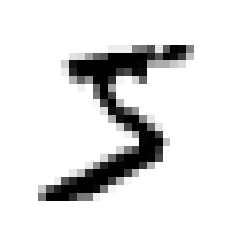

In [18]:
plt.imshow(primer_digito_imagen, cmap = 'binary') 
plt.axis('off')

plt.show()

Esto parece un 5, y de hecho eso es lo que nos dice la etiqueta:

In [ ]:
y[0]

Para darle una idea de la complejidad de la tarea de clasificación, la figura siguiente muestra algunas imágenes más del conjunto de datos MNIST.

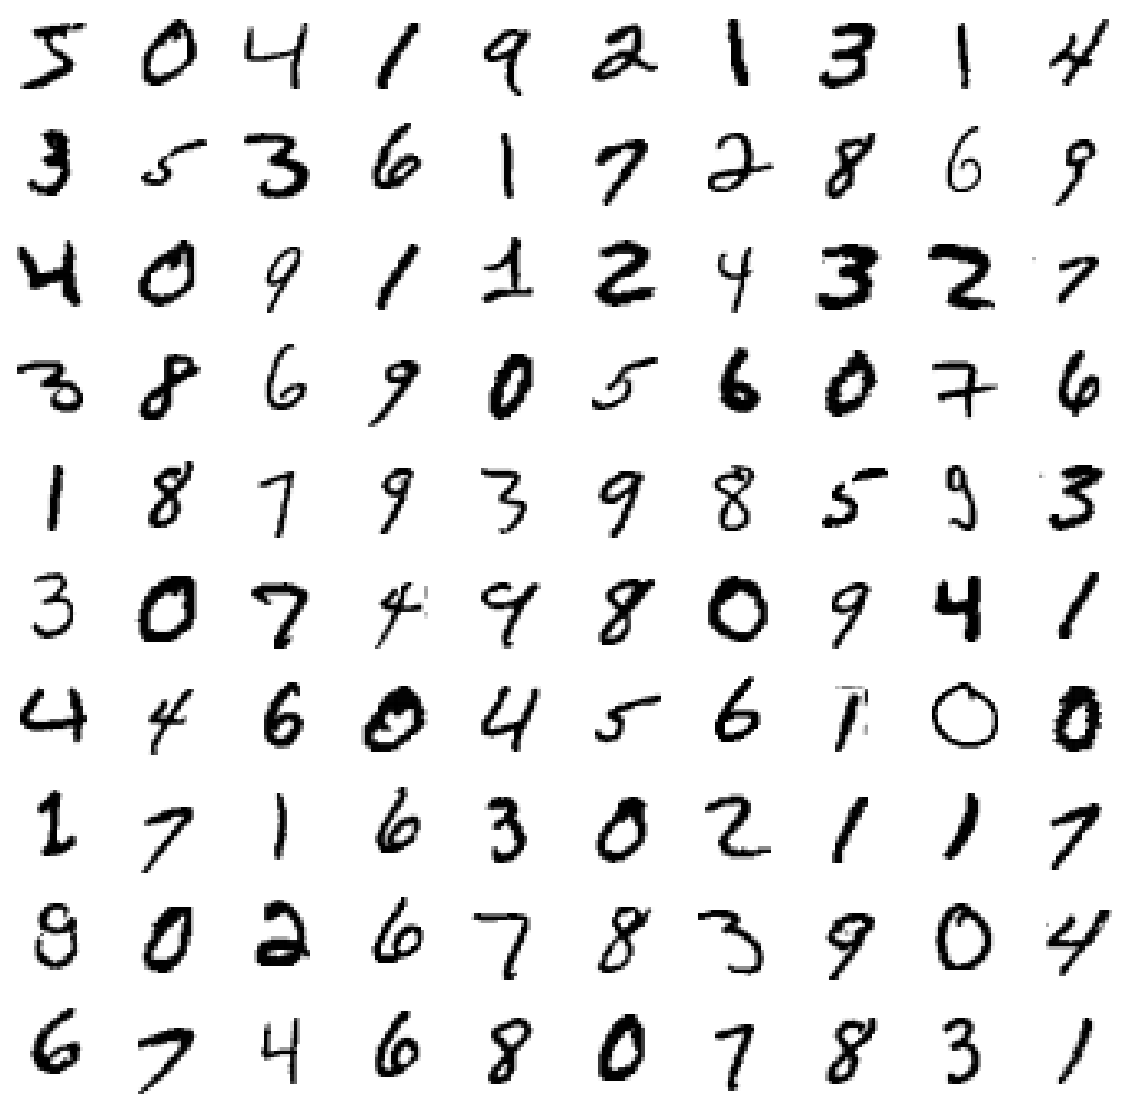

In [19]:
import matplotlib.pyplot as plt 
n = 10

fig, ax = plt.subplots(n,n, figsize = (20,20))


posicion = 0
for i in range(n):
    for j in range(n):
        ax[i][j].imshow(X[posicion,:].reshape(28,28), cmap = 'binary')
        ax[i][j].axis('off') 
        posicion+=1

        
plt.show()        

# Dividir en entrenamiento y testeo 

El conjunto de datos MNIST en realidad ya está dividido en un conjunto de entrenamiento (las primeras 60_000 imágenes) y un conjunto de prueba (las últimas 10_000 imágenes):

In [20]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

El conjunto de entrenamiento ya está barajado para nosotros, lo cual es bueno porque esto garantiza que todos los subconjuntos de validación cruzada serán similares  
* (no queremos que a algún subconjunto le falten algunos dígitos).

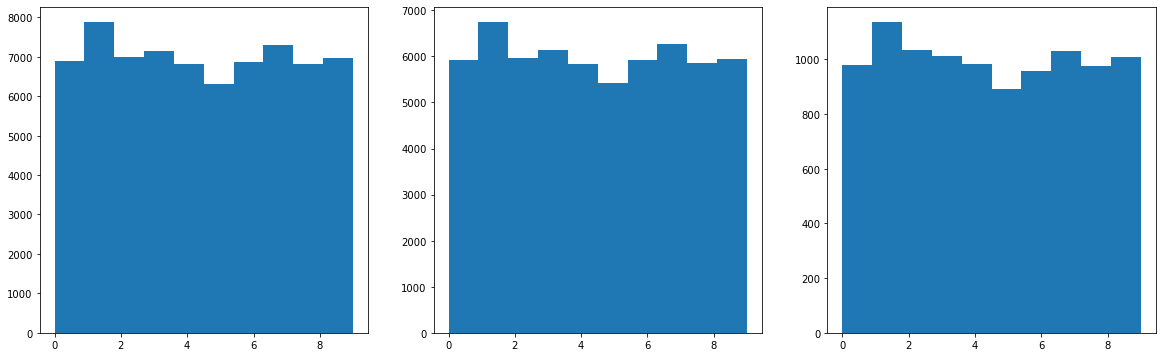

In [21]:
fig,ax = plt.subplots(1,3, figsize = (20,6)) 

ax[0].hist(y)
ax[1].hist(y_train)
ax[2].hist(y_test) 

plt.show() 

Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y funcionan mal si obtienen muchas instancias similares seguidas. 

Mezclar el conjunto de datos garantiza que esto no suceda.

## Entrenamiento de un clasificador binario

Simplifiquemos el problema por ahora y solo tratemos de identificar un dígito, por ejemplo, el número 5.

Este **5-detector** será un ejemplo de un clasificador binario, capaz de distinguir entre solo dos clases, 
* **5** y
* **no 5**.

Vamos a crear los vectores objetivo para esta tarea de clasificación:

In [22]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [23]:
len(y_train_5)  

60000

In [24]:
len(y_test_5)

10000

In [25]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [26]:
y_test_5

array([False, False, False, ..., False,  True, False])

Ahora vamos a elegir un clasificador y entrenarlo.

Un buen lugar para comenzar es con un clasificador **Stochastic Gradient Descent(SGD)**, utilizando la clase `SGDClassifier` de Scikit-Learn.

Este clasificador tiene la ventaja de ser capaz de manejar conjuntos de datos muy grandes de manera eficiente.

Esto se debe en parte a que el Gradiente descendente estocástico(SGD) se ocupa de las instancias de capacitación de forma independiente, una a la vez (lo que también hace que SGD sea muy adecuado para el aprendizaje en línea), como veremos más adelante. 

Vamos a crear un `SGDClassifier` y entrenarlo en todo el conjunto de entrenamiento:

In [27]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

# Empecemos evaluando su desempeño en el conjunto de entrenamiento con el criterio de exactitud(accuracy)

In [28]:
y_train_predict = sgd_clf.predict(X_train)

In [29]:
n_coincidencias = sum(y_train_5==y_train_predict)

In [30]:
n_coincidencias 

57136

In [31]:
len(y_train_5)

60000

In [32]:
n_coincidencias/len(y_train_5)

0.9522666666666667

Tenemos un desempeño general mayor al 95%

Ahora podemos usarlo para detectar imágenes del número 5:

In [33]:
[primer_digito.reshape(28,28)] 

[array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

In [34]:
sgd_clf.predict([primer_digito])

array([ True])

In [35]:
y[0]

5

In [36]:
sgd_clf.predict([X[11,:]])

array([ True])

El clasificador adivina que esta imagen representa un 5(`True`).

¡Parece que acertó en este caso particular!

Ahora, vamos a evaluar el rendimiento de este modelo.

## Medidas de desempeño

Evaluar un clasificador suele ser significativamente más complicado que evaluar un regresor.

### Medición de la exactitud mediante validación cruzada

Una buena manera de evaluar un modelo es usar la validación cruzada, tal como lo hizo en el Capítulo 2

## IMPLEMENTACIÓN DE LA VALIDACIÓN CRUZADA 

Ocasionalmente, necesitará más control sobre el proceso de validación cruzada que el que Scikit-Learn proporciona de manera estándar.

En estos casos, puede implementar la validación cruzada usted mismo.

El siguiente código hace más o menos lo mismo que la función `cross_val_score()` de Scikit-Learn e imprime el mismo resultado:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index,:]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index,:]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_test_fold==y_pred )
    print(n_correct / len(y_pred)) 

La clase `StratifiedKFold` realiza un muestreo estratificado (como se explica en el Capítulo 2) para producir subconjuntos que contienen una proporción representativa de cada clase.

En cada iteración, el código crea un clon del clasificador, entrena ese clon en los subconjuntos de entrenamiento y hace predicciones en el subconjunto de prueba.

Luego cuenta el número de predicciones correctas y genera la proporción de predicciones correctas. A esta proporción la llmaremos **exactitud**.

Usemos la función `cross_val_score()` para evaluar nuestro modelo `SGDClassifier`, usando la validación cruzada K-fold con tres subconjuntos. 

Recuerde que la validación cruzada de K-fold significa dividir el conjunto de entrenamiento en K subconjuntos (en este caso, tres), luego hacer predicciones y evaluarlas en cada subconjunto usando un modelo entrenado en los subconjuntos restantes (consulte el Capítulo 2):

In [ ]:
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

¡Guau! ¿Por encima del 93 % de **exactitud** (proporción de predicciones correctas) en todos los subconjuntos de validación cruzada? Esto se ve increíble, ¿no?

## [Video de apoyo](https://www.youtube.com/watch?v=TuiPYqYli4g)

## Lo insuficiente de la medida de exactitud

Bueno, antes de que te emociones demasiado, echemos un vistazo a un clasificador muy tonto que simplemente clasifica cada imagen en la clase "no-5":

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

class Clasificador_nunca_es_5(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool) 

¿Puedes adivinar la precisión de este modelo? Vamos a averiguar:

In [ ]:
clasificador_nunca_es_5 = Clasificador_nunca_es_5()

In [ ]:
cross_val_score(clasificador_nunca_es_5, X_train, y_train_5, cv = 3, scoring = 'accuracy') 

¡Así es, tiene más del 90% de precisión!

Esto se debe simplemente a que solo alrededor del 10 % de las imágenes son 5, por lo que si siempre adivina que una imagen no es un 5, acertará aproximadamente el 90 % de las veces. 

Esto demuestra por qué la **exactitud** generalmente no es la medida de rendimiento preferida para los clasificadores, especialmente cuando se trata de conjuntos de datos sesgados (es decir, cuando algunas clases son mucho más frecuentes que otras).

## [Video de apoyo a la lectura](https://www.youtube.com/watch?v=XCXPhmvwZAo)

## Matriz de confusión

Una forma mucho mejor de evaluar el rendimiento de un clasificador es observar la matriz de confusión.

La idea general es contar el número de veces que las instancias de la clase A se clasifican como clase B.

Por ejemplo, para saber la cantidad de veces que el clasificador confundió imágenes de 5 con 3, buscaría en la quinta fila y la tercera columna de la matriz de confusión.

Para calcular la matriz de confusión, primero debe tener un conjunto de predicciones para poder compararlas con los objetivos reales.

Podría hacer predicciones sobre el conjunto de prueba, pero no lo toquemos por ahora (recuerde que desea usar el conjunto de prueba solo al final de su proyecto, una vez que tenga un clasificador que esté listo para lanzar).

En su lugar, puedes usar la función `cross_val_predict()`:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3) 

In [ ]:
y_train_pred 

In [ ]:
len(y_train_pred)==len(y_train_5)

Al igual que la función `cross_val_score()`, `cross_val_predict()` realiza una **validación cruzada K-fold**, pero en lugar de devolver los puntajes de evaluación, devuelve las predicciones hechas en cada prueba.

Esto significa que obtiene una predicción limpia para cada instancia en el conjunto de entrenamiento ("limpio" significa que la predicción la realiza un modelo que nunca vio los datos durante el entrenamiento).

Ahora está listo para obtener la matriz de confusión usando la función `confusion_matrix()`.

Simplemente pásele las clases objetivo (`y_train_5`) y las clases predichas (`y_train_pred`):

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) 

Cada fila en una matriz de confusión representa una clase real, mientras que cada columna representa una clase predicha.

La primera fila de esta matriz considera imágenes que no son 5 

* (la clase negativa): 53.892 de ellas se clasificaron correctamente como que **no son 5** (se denominan **verdaderos negativos**), 

* mientras que las 687 restantes se clasificaron incorrectamente como 5 (**falsos positivos**).

* La segunda fila considera las imágenes de 5s (la clase positiva): 1.891 fueron clasificadas incorrectamente como no-5s **(falsos negativos)**, 

* mientras que las 3530 restantes fueron clasificadas correctamente como 5s **(verdaderos positivos)**.

Un clasificador perfecto solo tendría verdaderos positivos y verdaderos negativos, por lo que su matriz de confusión tendría valores distintos de cero solo en su diagonal principal (de arriba a la izquierda a abajo a la derecha):

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions) 

La matriz de confusión le brinda mucha información, pero a veces puede preferir una métrica más concisa.

Una interesante para observar es la precisión de las predicciones positivas; esto se llama la **precisión del clasificador**.

Ecuación que define a la Precisión:  

$$ \text{precision} = \frac{TP}{FP + TP} $$

$TP$ es el número de verdaderos positivos y $FP$ es el número de falsos positivos.

Una forma trivial de tener una precisión perfecta es hacer una sola predicción positiva y asegurarse de que sea correcta (precisión = 1/1 = 100 %).

Pero esto no sería muy útil, ya que el clasificador ignoraría todas las instancias positivas excepto una.

Por lo tanto, la precisión generalmente se usa junto con otra métrica llamada recuperación(recall), también llamada sensibilidad o tasa positiva verdadera (TPR): esta es la proporción de instancias positivas que el clasificador detecta correctamente (Ecuación 3-2).

Equation 3-2. Recall

$$ \text{recall} = \frac{TP}{FN + TP} $$

$FN$ es, por supuesto, el número de falsos negativos.

Si está confundido acerca de la matriz de confusión, la Figura 3-2 puede ayudar.

<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_2.png?raw=true'>

## Precisión y recuperación

Scikit-Learn proporciona varias funciones para calcular las métricas del clasificador, incluidas la precisión y la recuperación:

In [ ]:
from sklearn.metrics import precision_score, recall_score 

precision_score(y_train_5, y_train_pred) 

In [ ]:
recall_score(y_train_5, y_train_pred) 

Ahora su **5_detector** no se ve tan brillante como cuando miró su **exactitud**.

Cuando **afirma** que una imagen representa un 5, es correcta solo el 83.7% de las veces.

Además, solo **detecta** el 65.1% de los 5s.

A menudo es conveniente combinar la precisión y la recuperación en una sola métrica llamada *puntuación $F_{1}$*, en particular si necesita una forma sencilla de comparar dos clasificadores.

La puntuación $F_{1}$ es la media armónica de precisión y recuperación (Ecuación 3-3). 

Mientras que la media regular trata todos los valores por igual, la media armónica da mucho más peso a los valores bajos.

Como resultado, el clasificador solo obtendrá una puntuación alta de $F_{1}$ si tanto la recuperación como la precisión son altas.



$$ F_{1} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}} $$


Para calcular la puntuación $F_{1}$, simplemente llame a la función `f1_score()`:

In [ ]:
from sklearn.metrics import f1_score 

f1_score(y_train_5, y_train_pred) 

La puntuación $F_{1}$ favorece a los clasificadores que tienen una precisión y recuperación similares.

Esto no siempre es lo que desea: en algunos contextos, lo que más le importa es la precisión, y en otros contextos realmente le importa es el recall. 

Por ejemplo, si entrenó un clasificador para detectar videos que son seguros para los niños, probablemente preferiría un clasificador que rechace muchos videos buenos (baja recuperación) pero solo mantenga los seguros (alta precisión), en lugar de un clasificador que tiene mucho mejor recuerdo, pero permite que aparezcan algunos videos realmente malos en su producto (en tales casos, es posible que desee agregar una canalización humana para verificar la selección de videos del clasificador).

Por otro lado, suponga que entrena a un clasificador para detectar ladrones en imágenes de vigilancia: probablemente esté bien si su clasificador tiene solo un 30 % de precisión siempre que tenga un 99 % de recuperación (claro, los guardias de seguridad recibirán algunas alertas falsas, pero casi todos los ladrones serán atrapados).

Desafortunadamente, no puede tener las dos cosas: aumentar la precisión reduce la recuperación y viceversa.

Esto se llama equilibrio entre precisión/recuperación.

## Intercambio de precisión/recuperación

Para comprender esta compensación, veamos cómo el `SGDClassifier` toma sus decisiones de clasificación.

Para cada instancia, calcula una puntuación basada en una función de decisión.

Si esa puntuación es mayor que un umbral, asigna la instancia a la clase positiva; de lo contrario, lo asigna a la clase negativa.

La siguiente Figura muestra algunos dígitos ubicados desde la puntuación más baja a la izquierda hasta la puntuación más alta a la derecha.

<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_3.png?raw=true'>

Supongamos que el umbral de decisión se coloca en la flecha central (entre los dos 5): encontrará 4 verdaderos positivos (5 reales) a la derecha de ese umbral y 1 falso positivo (en realidad, un 6).

Por tanto, con ese umbral, la precisión es del 80% (4 sobre 5).

Pero de los seis **5 reales**, el clasificador solo detecta 4, por lo que la recuperación es del 67 % (4 de 6).

Si subes el umbral (muévelo hacia la flecha de la derecha), el falso positivo (el 6) se convierte en un verdadero negativo, aumentando así la precisión (hasta el 100% en este caso), pero un verdadero positivo se convierte en un falso negativo , disminuyendo el recuerdo hasta un 50%.

Por el contrario, bajar el umbral aumenta la recuperación y reduce la precisión.

Scikit-Learn **no** le permite establecer el umbral directamente, pero le da acceso a los puntajes de decisión que utiliza para hacer predicciones.

En lugar de llamar al método `predict()` del clasificador, puede llamar a su método `decision_function()`, que devuelve un puntaje para cada instancia, y luego usar cualquier umbral que desee para hacer predicciones basadas en esos puntajes:

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)


El SGDClassifier usa un umbral igual a 0, por lo que el código anterior devuelve el mismo resultado que el método `predict()` (es decir, `True`).

Subamos el umbral:

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


Esto confirma que elevar el umbral disminuye el recuerdo.

La imagen en realidad representa un 5, y el clasificador lo detecta cuando el umbral es 0, pero lo pierde cuando el umbral aumenta a 8000.

¿Cómo se decide qué umbral usar?

Primero, use la función `cross_val_predict()` para obtener los puntajes de todas las instancias en el conjunto de entrenamiento, pero esta vez especifique que desea obtener puntajes de decisión en lugar de predicciones:

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

Con estas puntuaciones, utilice la función `precision_recall_curve()` para calcular la precisión y la recuperación de todos los umbrales posibles:

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finalmente, use Matplotlib para trazar la precisión y recordar como funciones del valor de umbral (Figura 3-4):

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
[...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_4.png?raw=true'>

## Nota 

Quizás se pregunte por qué la curva de precisión es más irregular que la curva de recuperación de la figura 3-4.

El motivo es que, en ocasiones, la precisión puede disminuir cuando aumenta el umbral (aunque, en general, aumentará).

Para comprender por qué, vuelva a mirar la Figura 3-3 y observe lo que sucede cuando comienza desde el umbral central y lo mueve solo un dígito a la derecha: la precisión va de 4/5 (80 %) a 3/4 (75 %). ).

On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.

Another way to select a good precision/recall trade-off is to plot precision directly against recall, as shown in Figure 3-5 (the same threshold as earlier is highlighted).


<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_5.png?raw=true'>

You can see that precision really starts to fall sharply around 80% recall.

You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. 

But of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. 

You look up the first plot and find that you need to use a threshold of about 8,000. 

To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value):

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816


To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can run this code:


In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Let’s check these predictions’ precision and recall:

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)


Great, you have a 90% precision classifier! 

As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. 

But wait, not so fast. 

A high-precision classifier is not very useful if its recall is too low!

## TIP

If someone says, “Let’s reach 99% precision,” you should ask, “At what recall?”

## The ROC Curve  

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR).

The FPR is the ratio of negative instances that are incorrectly classified as positive. 

It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. 

The TNR is also called specificity. 

Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


Then you can plot the FPR against the TPR using Matplotlib. 

This code produces the plot in Figure 3-6:

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
[...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. 

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_6.png?raw=true'>

One way to compare classifiers is to measure the area under the curve (AUC). 

A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 

Scikit-Learn provides a function to compute the ROC AUC:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

## TIP

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder
how to decide which one to use. 

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. 

Otherwise, use the ROC curve. 

For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good.

But this is mostly because there are few positives (5s) compared to the negatives (non 5s). 

In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-left corner).

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. 

First, you need to get scores for each instance in the training set. 

But due to the way it works (see Chapter 7), the RandomForestClassifier class does not have a
decision_function() method. 

Instead, it has a predict_proba() method. 

Scikit-Learn classifiers generally have one or the other, or both.

The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")


The `roc_curve()` function expects labels and scores, but instead of scores you can give it class probabilities. 

Let’s use the positive class’s probability as the score:

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest =
roc_curve(y_train_5,y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC
curve as well to see how they compare (Figure 3-7):

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


<img src = 'https://github.com/marco-canas/Machine-Learning/blob/main/ML/classes/class_mach_8/digitos_mnist_7.png?raw=true'>

As you can see in Figure 3-7, the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. 

As a result, its ROC AUC score is also significantly better:

In [ ]:
>>> roc_auc_score(y_train_5, y_scores_forest)

Try measuring the precision and recall scores: you should find 99.0% precision and 86.6% recall. Not too bad!

You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall trade-off that fits your needs, and use ROC curves and ROC AUC scores to compare various models. 

Now let’s try to detect more than just the 5s.

## Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively.

Others (such as Logistic Regression or Support Vector Machine classifiers)
are strictly binary classifiers. 

However, there are various strategies that you
can use to perform multiclass classification with multiple binary classifiers.
One way to create a system that can classify the digit images into 10 classes
(from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector,
a 1-detector, a 2-detector, and so on). 

Then when you want to classify an
image, you get the decision score from each classifier for that image and
you select the class whose classifier outputs the highest score. This is called
the one-versus-the-rest (OvR) strategy (also called one-versus-all).
Another strategy is to train a binary classifier for every pair of digits: one to
distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are
N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST
problem, this means training 45 binary classifiers! When you want to
classify an image, you have to run the image through all 45 classifiers and
see which class wins the most duels. The main advantage of OvO is that
each classifier only needs to be trained on the part of the training set for the
two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly
with the size of the training set. For these algorithms OvO is preferred
because it is faster to train many classifiers on small training sets than to
train few classifiers on large training sets. For most binary classification
algorithms, however, OvR is preferred.
Scikit-Learn detects when you try to use a binary classification algorithm
for a multiclass classification task, and it automatically runs OvR or OvO,
depending on the algorithm. Let’s try this with a Support Vector Machine
classifier (see Chapter 5), using the sklearn.svm.SVC class:

In [ ]:
>>> from sklearn.svm import SVC
>>> svm_clf = SVC()
>>> svm_clf.fit(X_train, y_train) # y_train, not y_train_5
>>> svm_clf.predict([some_digit])


That was easy! This code trains the SVC on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-the rest target classes (y_train_5). 

Then it makes a prediction (a correct one in this case). 

Under the hood, Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels.

If you call the decision_function() method, you will see that it returns
10 scores per instance (instead of just 1). That’s one score per class:

In [ ]:
>>> some_digit_scores = svm_clf.decision_function([some_digit])
>>> some_digit_scores


The highest score is indeed the one corresponding to class 5:

In [ ]:
>>> np.argmax(some_digit_scores)


In [ ]:
>>> svm_clf.classes_

In [ ]:
>>> svm_clf.classes_[5]


## WARNING

When a classifier is trained, it stores the list of target classes in its classes_ attribute,
ordered by value. In this case, the index of each class in the classes_ array
conveniently matches the class itself (e.g., the class at index 5 happens to be class 5),
but in general you won’t be so lucky.

If you want to force Scikit-Learn to use one-versus-one or one-versus-the rest, you can use the OneVsOneClassifier or OneVsRestClassifier
classes. 

Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier). 

For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC:

In [ ]:
>>> from sklearn.multiclass import OneVsRestClassifier
>>> ovr_clf = OneVsRestClassifier(SVC())
>>> ovr_clf.fit(X_train, y_train)
>>> ovr_clf.predict([some_digit])

In [ ]:
>>> len(ovr_clf.estimators_)

Training an SGDClassifier (or a RandomForestClassifier) is just as
easy:

In [ ]:
>>> sgd_clf.fit(X_train, y_train)
>>> sgd_clf.predict([some_digit])


This time Scikit-Learn did not have to run OvR or OvO because SGD classifiers can directly classify instances into multiple classes. 

The decision_function() method now returns one value per class. 

Let’s look at the score that the SGD classifier assigned to each class:

In [ ]:
>>> sgd_clf.decision_function([some_digit])


You can see that the classifier is fairly confident about its prediction: almost
all scores are largely negative, while class 5 has a score of 2412.5. The
model has a slight doubt regarding class 3, which gets a score of 573.5.
Now of course you want to evaluate this classifier. As usual, you can use
cross-validation. Use the cross_val_score() function to evaluate the
SGDClassifier’s accuracy:

In [ ]:
>>> cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


It gets over 84% on all test folds. If you used a random classifier, you
would get 10% accuracy, so this is not such a bad score, but you can still do
much better. Simply scaling the inputs (as discussed in Chapter 2) increases
accuracy above 89%:

In [ ]:
>>> from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler()
>>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
>>> cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## Error Analysis

If this were a real project, you would now follow the steps in your Machine
Learning project checklist (see Appendix B). You’d explore data
preparation options, try out multiple models (shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV), and automate as
much as possible. Here, we will assume that you have found a promising
model and you want to find ways to improve it. One way to do this is to
analyze the types of errors it makes.
First, look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix()
function, just like you did earlier:


In [ ]:
>>> y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
>>> conf_mx = confusion_matrix(y_train, y_train_pred)
>>> conf_mx


That’s a lot of numbers. It’s often more convenient to look at an image
representation of the confusion matrix, using Matplotlib’s matshow()
function:

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


This confusion matrix looks pretty good, since most images are on the main
diagonal, which means that they were classified correctly. The 5s look
slightly darker than the other digits, which could mean that there are fewer
images of 5s in the dataset or that the classifier does not perform as well on
5s as on other digits. 

In fact, you can verify that both are the case.
Let’s focus the plot on the errors. First, you need to divide each value in the
confusion matrix by the number of images in the corresponding class so
that you can compare error rates instead of absolute numbers of errors
(which would make abundant classes look unfairly bad):

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Fill the diagonal with zeros to keep only the errors, and plot the result:


In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

You can clearly see the kinds of errors the classifier makes. Remember that
rows represent actual classes, while columns represent predicted classes.
The column for class 8 is quite bright, which tells you that many images get
misclassified as 8s. However, the row for class 8 is not that bad, telling you
that actual 8s in general get properly classified as 8s. As you can see, the
confusion matrix is not necessarily symmetrical. You can also see that 3s
and 5s often get confused (in both directions).

Analyzing the confusion matrix often gives you insights into ways to
improve your classifier. Looking at this plot, it seems that your efforts
should be spent on reducing the false 8s. For example, you could try to
gather more training data for digits that look like 8s (but are not) so that the
classifier can learn to distinguish them from real 8s. Or you could engineer
new features that would help the classifier—for example, writing an
algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5
has none). Or you could preprocess the images (e.g., using Scikit-Image,
Pillow, or OpenCV) to make some patterns, such as closed loops, stand out
more.
Analyzing individual errors can also be a good way to gain insights on what
your classifier is doing and why it is failing, but it is more difficult and
time-consuming. For example, let’s plot examples of 3s and 5s (the
plot_digits() function just uses Matplotlib’s imshow() function; see this
chapter’s Jupyter notebook for details):

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


The two 5 × 5 blocks on the left show digits classified as 3s, and the two 5
× 5 blocks on the right show images classified as 5s. Some of the digits that
the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so
badly written that even a human would have trouble classifying them (e.g.,
the 5 in the first row and second column truly looks like a badly written 3).
However, most misclassified images seem like obvious errors to us, and it’s
hard to understand why the classifier made the mistakes it did. The reason
is that we used a simple SGDClassifier, which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new
image it just sums up the weighted pixel intensities to get a score for each
3
class. So since 3s and 5s differ only by a few pixels, this model will easily
confuse them.
The main difference between 3s and 5s is the position of the small line that
joins the top line to the bottom arc. If you draw a 3 with the junction
slightly shifted to the left, the classifier might classify it as a 5, and vice
versa. In other words, this classifier is quite sensitive to image shifting and
rotation. So one way to reduce the 3/5 confusion would be to preprocess the
images to ensure that they are well centered and not too rotated. This will
probably help reduce other errors as well.

## Multilabel Classification

Until now each instance has always been assigned to just one class. 

In some
cases you may want your classifier to output multiple classes for each
instance. Consider a face-recognition classifier: what should it do if it
recognizes several people in the same picture? It should attach one tag per
person it recognizes. Say the classifier has been trained to recognize three
faces, Alice, Bob, and Charlie. 

Then when the classifier is shown a picture
of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no,
Charlie yes”). Such a classification system that outputs multiple binary tags
is called a multilabel classification system.
We won’t go into face recognition just yet, but let’s look at a simpler
example, just for illustration purposes:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


This code creates a y_multilabel array containing two target labels for
each digit image: the first indicates whether or not the digit is large (7, 8, or
9), and the second indicates whether or not it is odd. The next lines create a
KNeighborsClassifier instance (which supports multilabel classification,
though not all classifiers do), and we train it using the multiple targets array.
Now you can make a prediction, and notice that it outputs two labels:


In [ ]:
>>> knn_clf.predict([some_digit])


And it gets it right! The digit 5 is indeed not large (False) and odd (True).
There are many ways to evaluate a multilabel classifier, and selecting the
right metric really depends on your project. One approach is to measure the
F score for each individual label (or any other binary classifier metric
discussed earlier), then simply compute the average score. This code
computes the average F score across all labels:


In [ ]:
>>> y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
>>> f1_score(y_multilabel, y_train_knn_pred, average="macro")

This assumes that all labels are equally important, however, which may not
be the case. In particular, if you have many more pictures of Alice than of
Bob or Charlie, you may want to give more weight to the classifier’s score
on pictures of Alice. One simple option is to give each label a weight equal
to its support (i.e., the number of instances with that target label). To do
this, simply set average="weighted" in the preceding code.

Multioutput Classification
The last type of classification task we are going to discuss here is called
multioutput–multiclass classification (or simply multioutput classification).
It is simply a generalization of multilabel classification where each label
can be multiclass (i.e., it can have more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It
will take as input a noisy digit image, and it will (hopefully) output a clean
1
1
4
digit image, represented as an array of pixel intensities, just like the MNIST
images. Notice that the classifier’s output is multilabel (one label per pixel)
and each label can have multiple values (pixel intensity ranges from 0 to
255). It is thus an example of a multioutput classification system.
NOTE
The line between classification and regression is sometimes blurry, such as in this
example. Arguably, predicting pixel intensity is more akin to regression than to
classification. Moreover, multioutput systems are not limited to classification tasks; you
could even have a system that outputs multiple labels per instance, including both class
labels and value labels.
Let’s start by creating the training and test sets by taking the MNIST images
and adding noise to their pixel intensities with NumPy’s randint()
function. The target images will be the original images:


In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let’s take a peek at an image from the test set (yes, we’re snooping on the
test data, so you should be frowning right now):


On the left is the noisy input image, and on the right is the clean target
image. Now let’s train the classifier and make it clean this image:

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)


Looks close enough to the target! This concludes our tour of classification.
You should now know how to select good metrics for classification tasks,
pick the appropriate precision/recall trade-off, compare classifiers, and
more generally build good classification systems for a variety of tasks.


Exercises
1. Try to build a classifier for the MNIST dataset that achieves over
97% accuracy on the test set. Hint: the KNeighborsClassifier
works quite well for this task; you just need to find good
hyperparameter values (try a grid search on the weights and
n_neighbors hyperparameters).
2. Write a function that can shift an MNIST image in any direction
(left, right, up, or down) by one pixel. Then, for each image in the
training set, create four shifted copies (one per direction) and add
them to the training set. Finally, train your best model on this
expanded training set and measure its accuracy on the test set. You
should observe that your model performs even better now! This
technique of artificially growing the training set is called data
augmentation or training set expansion.
3. Tackle the Titanic dataset. A great place to start is on Kaggle.
4. Build a spam classifier (a more challenging exercise):
Download examples of spam and ham from Apache
SpamAssassin’s public datasets.
Unzip the datasets and familiarize yourself with the data
format.
Split the datasets into a training set and a test set.
Write a data preparation pipeline to convert each email
into a feature vector. Your preparation pipeline should
transform an email into a (sparse) vector that indicates the
presence or absence of each possible word. For example,
if all emails only ever contain four words, “Hello,” “how,”
“are,” “you,” then the email “Hello you Hello Hello you”
would be converted into a vector [1, 0, 0, 1] (meaning
[“Hello” is present, “how” is absent, “are” is absent,
“you” is present]), or [3, 0, 0, 2] if you prefer to count the
number of occurrences of each word.
5
You may want to add hyperparameters to your preparation
pipeline to control whether or not to strip off email
headers, convert each email to lowercase, remove
punctuation, replace all URLs with “URL,” replace all
numbers with “NUMBER,” or even perform stemming
(i.e., trim off word endings; there are Python libraries
available to do this).
Finally, try out several classifiers and see if you can build
a great spam classifier, with both high recall and high
precision.
Solutions to these exercises can be found in the Jupyter notebooks available
at https://github.com/ageron/handson-ml2.

## Referencias  

* Obtener conjunto de datos de openml por nombre o ID de conjunto de datos.

Los conjuntos de datos se identifican de forma única ya sea por una identificación de número entero o por una combinación de nombre y versión (es decir, puede haber varias versiones del conjunto de datos 'iris'). Proporcione nombre o data_id (no ambos). En caso de que se dé un nombre, también se puede proporcionar una versión.  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html